## Challenge Description:Techgig 2018 Code Gladiator

Stock markets have always been a fancy for companies, investors and traders. There is a plethora of investors investing or exiting the stocks at any point of time with different trading strategies and investment horizons. However the underlying objective of every type of investor is common "Maximize the returns and minimize the losses." To achieve this objective every investor is intrigued with one question “Is my stock price going to rise or fall in future".
People have been trying to find this answer from various angles. For some investors fundamentals are important and hence they rely on the fundamental strength of the stock. Others try to predict the movement of the stock based on technical analysis. Some try to predict the movement based on news about stocks and overall market sentiment while other tries to track the trend to predict the price of stock.

In this competition we challenge you to identify the predictability in the market based on technical analysis of stocks.

## Goal

The problem statement for this competition is to design a decision-making framework that can be used to predict actual return value of stock after 30th trading days.

To elaborate, we want to predict for list of given stocks and their return after 30th trading days.

In this competition we have given you 12 stocks of Banking and IT sector in csv format with last 5 years of stock details.

Above stock data has been downloaded from Yahoo Finance, but participants are free to download any other historical data from Yahoo finance if they are interested.
File format for stock data


Following technical indicators should be generated using any open source packages available in R or python for technical Analysis ( like TTR in R or Talib in Python)
Simple Moving Average ( 30, 40, 50 Days)
Exponential Moving Average ( 30, 40, 50 Days)
Aroon Oscillator ( 30, 40, 50 Days)
MACD signals
Relative Strength Index (RSI)
Bollinger Bands ( 30, 40, 50 Days)
Stochastic Oscillator
Stochastic momentum Indicator
Chande Momentum Oscillator
Commodity Channel Index ( 30, 40, 50 Days)
Chakin Volatility indicator ( 30, 40, 50 Days)
Trend Detection Index (30, 40, 50 Days)
Rate of Price Change (30, 40, 50 Days)
Rate of Volume Change (30, 40, 50 Days)
William % R (30, 40, 50 Days)
Participants are free to transform and derive more features from the above set of indicators from short term as well as long term perspective.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
infy_dataset = pd.read_csv("complete_data_set_v1/INFY.NS.csv")

In [9]:
infy_dataset['Date'] = pd.to_datetime(infy_dataset['Date'],format='%Y-%m')

In [11]:
#infy_dataset.index = infy_dataset['Date']

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
infy_dataset['Close'] = pd.to_numeric(infy_dataset['Close'],errors='coerce')

In [17]:
infy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1232 entries, 2013-04-04 to 2018-04-04
Data columns (total 7 columns):
Date         1232 non-null datetime64[ns]
Open         1232 non-null object
High         1232 non-null object
Low          1232 non-null object
Close        1230 non-null float64
Adj Close    1232 non-null object
Volume       1232 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 77.0+ KB


In [21]:
infy_dataset[infy_dataset.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-03-22,2014-03-22,null,null,null,NaN,null,null
2015-02-28,2015-02-28,null,null,null,NaN,null,null


In [23]:
infy_dataset = infy_dataset.dropna(axis=0,how='any')

In [24]:
infy_dataset[infy_dataset.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,


In [25]:
infy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1230 entries, 2013-04-04 to 2018-04-04
Data columns (total 7 columns):
Date         1230 non-null datetime64[ns]
Open         1230 non-null object
High         1230 non-null object
Low          1230 non-null object
Close        1230 non-null float64
Adj Close    1230 non-null object
Volume       1230 non-null object
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 76.9+ KB


In [80]:
infy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 7 columns):
Date         1232 non-null object
Open         1232 non-null object
High         1232 non-null object
Low          1232 non-null object
Close        1232 non-null object
Adj Close    1232 non-null object
Volume       1232 non-null object
dtypes: object(7)
memory usage: 67.5+ KB


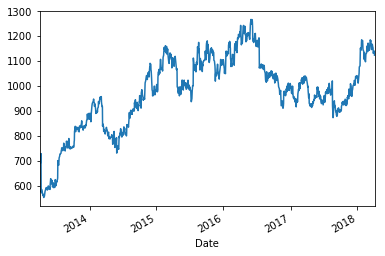

In [29]:
infy_dataset['Close'].plot()

In [30]:
'''Create new column to show closing price after 30th day'''
forecast_out = int(30) # predicting 30 days into future
infy_dataset['Prediction'] = infy_dataset[['Close']].shift(-forecast_out)
#for i in np.arange(len(infy_dataset)-30):
#    infy_dataset.loc[i,'AfterMonth'] = infy_dataset.loc[i+30,'Close']
    

C:\Users\Vani\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
infy_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,,
2013-04-04,2013-04-04,736.250000,737.286987,718.013000,720.013000,553.244873,3749980,599.400024
2013-04-05,2013-04-05,719.750000,724.750000,712.500000,716.463013,550.517151,2186480,596.325012
2013-04-08,2013-04-08,712.500000,718.411987,706.812012,707.974976,543.995117,1858180,589.963013
2013-04-09,2013-04-09,708.388000,709.737000,689.062012,691.588013,531.403687,5420328,586.974976
2013-04-10,2013-04-10,700.750000,706.950012,694.062012,703.911987,540.873230,3275808,593.174988


In [34]:
infy_dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,,
2018-03-27,2018-03-27,1160.000000,1161.300049,1150.099976,1154.000000,1154.000000,1901044,NaN
2018-03-28,2018-03-28,1150.750000,1150.750000,1126.250000,1131.800049,1131.800049,6279161,NaN
2018-04-02,2018-04-02,1131.800049,1149.550049,1121.300049,1137.150024,1137.150024,4036351,NaN
2018-04-03,2018-04-03,1134.699951,1143.550049,1128.099976,1140.449951,1140.449951,2038584,NaN
2018-04-04,2018-04-04,1144.000000,1144.550049,1120.000000,1124.199951,1124.199951,2406651,NaN


In [37]:
from sklearn import preprocessing, cross_validation, svm

C:\Users\Vani\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
X = infy_dataset['Close']
X = X.reshape(X.shape[0],1)
X = preprocessing.scale(X)

C:\Users\Vani\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [50]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last 30
X = X[:-forecast_out] # remove last 30 from X

In [51]:
y = np.array(infy_dataset['Prediction'])
y = y[:-forecast_out]

In [52]:

y = y.reshape(y.shape[0],1)

In [53]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

In [54]:
# Training
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.806389351689


In [57]:
infy_dataset[infy_dataset.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,,
2018-02-19,2018-02-19,1128.400024,1136.000000,1120.300049,1131.750000,1131.750000,3230920,NaN
2018-02-20,2018-02-20,1103.750000,1149.500000,1103.750000,1136.949951,1136.949951,3594297,NaN
2018-02-21,2018-02-21,1147.500000,1151.900024,1140.000000,1147.400024,1147.400024,6885679,NaN
2018-02-22,2018-02-22,1145.550049,1164.000000,1140.449951,1160.750000,1160.750000,8929987,NaN
2018-02-23,2018-02-23,1163.500000,1166.000000,1146.750000,1155.650024,1155.650024,4729914,NaN
2018-02-26,2018-02-26,1151.000000,1155.050049,1134.349976,1138.599976,1138.599976,2541804,NaN
2018-02-27,2018-02-27,1144.949951,1153.650024,1125.650024,1150.199951,1150.199951,3308013,NaN
2018-02-28,2018-02-28,1147.599976,1189.500000,1142.550049,1172.599976,1172.599976,8634208,NaN
2018-03-01,2018-03-01,1169.599976,1169.599976,1156.050049,1160.750000,1160.750000,3289926,NaN


In [55]:
forecast_prediction = clf.predict(X_forecast)
print(forecast_prediction)

[[ 1116.8771434 ]
 [ 1121.14491087]
 [ 1129.72162275]
 [ 1140.67837854]
 [ 1136.49266379]
 [ 1122.49913959]
 [ 1132.01961313]
 [ 1150.40403597]
 [ 1140.67837854]
 [ 1136.69784685]
 [ 1132.96347573]
 [ 1127.01316695]
 [ 1137.31339603]
 [ 1142.8533387 ]
 [ 1161.1966847 ]
 [ 1159.59629704]
 [ 1157.1341003 ]
 [ 1158.5293049 ]
 [ 1149.82956279]
 [ 1129.1881271 ]
 [ 1143.7972013 ]
 [ 1146.21832121]
 [ 1141.1298215 ]
 [ 1146.30037474]
 [ 1136.16435119]
 [ 1135.13843588]
 [ 1116.91822023]
 [ 1121.30911723]
 [ 1124.01747373]
 [ 1110.68057472]]


In [58]:
clf.coef_

array([[ 123.93813277]])

In [59]:
clf.intercept_

array([ 984.89372988])